# Neutron Flux Data Analysis
This notebook analyzes synthetic neutron flux data generated for a simplied reactor model.

Load Data

In [28]:
import pandas as pd 
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("../data/neutron_flux.csv")
df.head()

,position_cm,neutron_flux_region1,neutron_flux_region2
0,0.000000,1.004967e+13,9.858463e+12
1,1.010101,9.493665e+12,9.757942e+12
2,2.020202,9.104008e+12,9.569742e+12
3,3.030303,8.746352e+12,9.331712e+12
4,4.040404,8.147369e+12,9.207578e+12


Basic Statistics

In [30]:
df.describe()

,position_cm,neutron_flux_region1,neutron_flux_region2
count,100.000000,1.000000e+02,1.000000e+02
mean,50.000000,2.007029e+12,4.339233e+12
std,29.304537,2.535353e+12,2.461021e+12
min,0.000000,-6.388760e+10,1.239056e+12
25%,25.000000,2.554409e+11,2.294484e+12
50%,50.000000,7.949317e+11,3.702095e+12
75%,75.000000,2.860449e+12,6.161688e+12
max,100.000000,1.004967e+13,9.858463e+12


Plot Neutron Flux vs Position

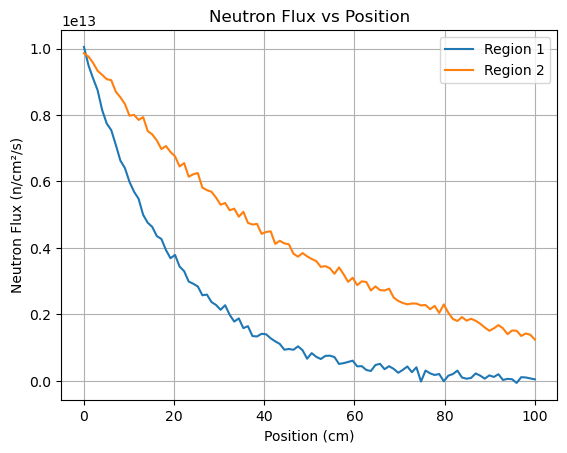

In [31]:
plt.figure()
plt.plot(df["position_cm"],df["neutron_flux_region1"], label="Region 1")
plt.plot(df["position_cm"],df["neutron_flux_region2"], label="Region 2")
plt.xlabel("Position (cm)")
plt.ylabel("Neutron Flux (n/cm²/s)")
plt.title("Neutron Flux vs Position")
plt.legend()
plt.grid()
plt.show()

This neutron flux decrease with increasing position, consisten with exponential attenuation. Small fluctuations are present due to added noise, representing measurement uncertainty.

Use optimization tool

In [32]:
from scipy.optimize import curve_fit
import numpy as np 

In [33]:
def flux_model(x, A,L):
    return A * np.exp(-x / L)

In [34]:
x_data = df["position_cm"].values
y_data = df["neutron_flux_region1"].values  

params, _ = curve_fit(flux_model, x_data, y_data, p0=(1e13, 30))

A_fit, L_fit = params
A_fit, L_fit

(np.float64(10050616487424.05), np.float64(19.74059734778386))

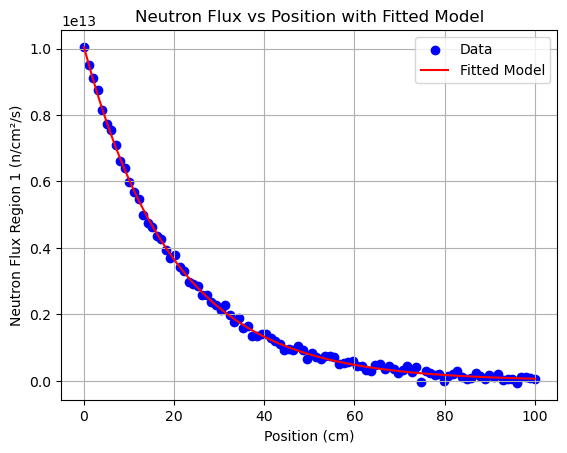

In [38]:
plt.figure()
plt.scatter(x_data, y_data, label="Data", color="blue")
plt.plot(x_data, flux_model(x_data, A_fit, L_fit), label="Fitted Model", color="red")
plt.xlabel("Position (cm)")
plt.ylabel("Neutron Flux Region 1 (n/cm²/s)")
plt.title("Neutron Flux vs Position with Fitted Model")
plt.legend()
plt.grid()
plt.show()

The fitted parameter A represents the neutron flux at the core entrance.
The parameter L represents an effective attenuation length, consistent with neutron diffusion theory.

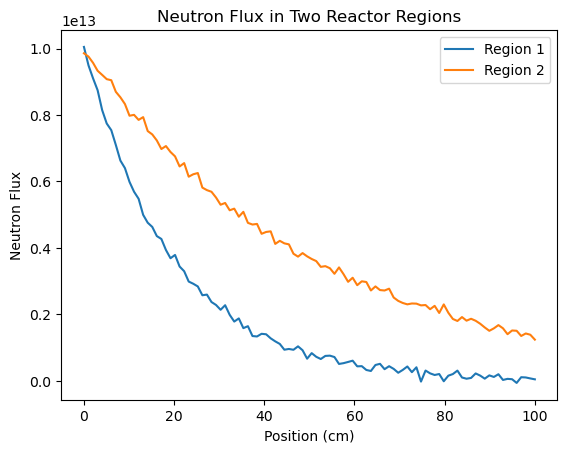

In [37]:
plt.figure()
plt.plot(df["position_cm"], df["neutron_flux_region1"], label="Region 1")
plt.plot(df["position_cm"], df["neutron_flux_region2"], label="Region 2")
plt.xlabel("Position (cm)")
plt.ylabel("Neutron Flux")
plt.title("Neutron Flux in Two Reactor Regions")
plt.legend()
plt.show()

Region 1 exhibits faster neutron attenuation due to a smaller diffusion length.
Region 2 maintains higher neutron flux deeper into the core.